In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv("Titanic.csv",encoding = "ISO-8859-1") #"utf-8"

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [5]:
df["who"] = df[["Age", "Sex"]].apply(woman_child_or_man, axis=1)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,man
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [7]:
df.Pclass.unique()

array([3, 1, 2])

In [8]:
df["class"] = df.Pclass.map({1: "First", 2: "Second", 3: "Third"})

In [9]:
df[["class","Pclass"]].head()

,class,Pclass
0,Third,3
1,First,1
2,Third,3
3,First,1
4,Third,3


In [10]:
df["adult_male"] = df.who == "man"

In [11]:
df[["who","adult_male"]].head()

,who,adult_male
0,man,True
1,woman,False
2,woman,False
3,woman,False
4,man,True


In [12]:
df["deck"] = df.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)

In [13]:
df[["deck","Cabin"]].head()

,deck,Cabin
0,NaN,NaN
1,C,C85
2,NaN,NaN
3,C,C123
4,NaN,NaN


## Map

In [14]:
df["embark_town"] = df.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})

In [15]:
df[["embark_town","Embarked"]].head()

,embark_town,Embarked
0,Southampton,S
1,Cherbourg,C
2,Southampton,S
3,Southampton,S
4,Southampton,S


In [16]:
df["alive"] = df.Survived.map({0: "no", 1: "yes"})

In [17]:
df[["alive","Survived"]].head() # just for visialisation, but in ML 0,1 would be better

,alive,Survived
0,no,0
1,yes,1
2,yes,1
3,yes,1
4,no,0


In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'who', 'class',
       'adult_male', 'deck', 'embark_town', 'alive'],
      dtype='object')

In [19]:
df["alone"]  = ~  (df.Parch + df.SibSp).astype(bool)

In [20]:
df[["SibSp","alone","Parch"]].head()

,SibSp,alone,Parch
0,1,False,0
1,1,False,0
2,0,True,0
3,1,False,0
4,0,True,0


In [21]:
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)

#  = ~ 

In [22]:
x = ~ 2
print(x)

-3


# Visualization

In [23]:
sns.set_palette(sns.color_palette("deep", 10))

###  Who were the Titanic passengers?

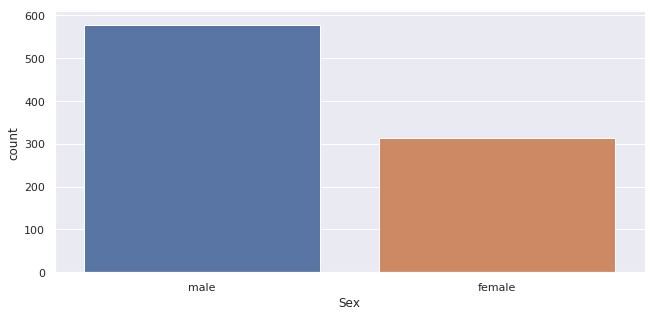

In [24]:
g = sns.catplot("Sex",data=df[df.Sex.notnull()],
                  kind="count", height=4.5, aspect=2)

## Titanic’s passengers’ ages distribution.

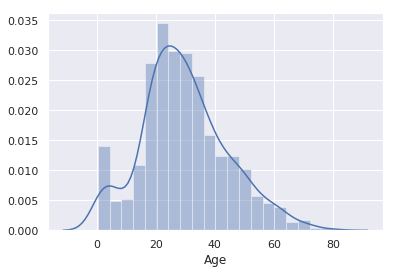

In [25]:
sns.distplot(df.Age.dropna(),kde=True) # We need to drop NaN values for distplot not to raise a ValueError exception.

In [26]:
df.Age.min()

0.42

### break down the plot above  by some Age

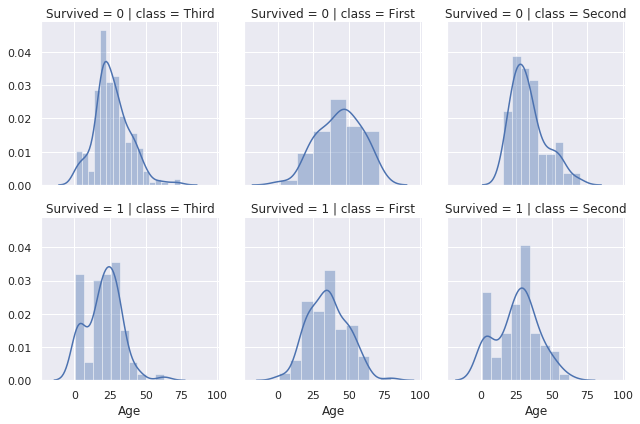

In [27]:
g = sns.FacetGrid(df, row='Survived', col='class')
g.map(sns.distplot, "Age")
plt.show()

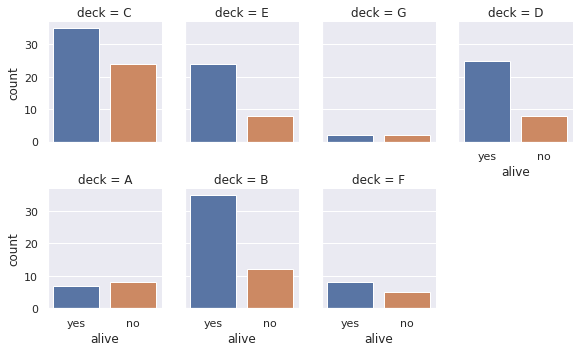

In [28]:
 g = sns.catplot("alive", col="deck", col_wrap=4,
                  data=df[df.deck.notnull()],
                  kind="count", height=2.5, aspect=.8)

# Correlation 

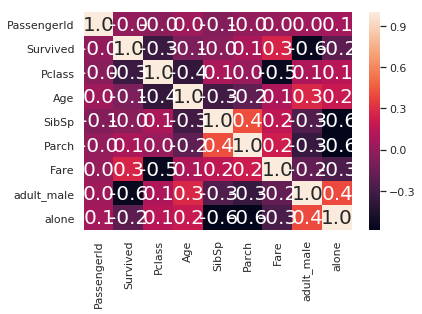

In [35]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")#,annot_kws={'fontsize':20}

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who,class,adult_male,deck,embark_town,alive,alone
0,1,0,3,male,22.0,1,0,7.2500,S,man,Third,True,NaN,Southampton,no,False
1,2,1,1,female,38.0,1,0,71.2833,C,woman,First,False,C,Cherbourg,yes,False
2,3,1,3,female,26.0,0,0,7.9250,S,woman,Third,False,NaN,Southampton,yes,True
3,4,1,1,female,35.0,1,0,53.1000,S,woman,First,False,C,Southampton,yes,False
4,5,0,3,male,35.0,0,0,8.0500,S,man,Third,True,NaN,Southampton,no,True


In [42]:
ch="    my    name     is   emna    "

In [43]:
j=0
for i in range(len(ch)-1):
    if ch[i]==" " and ch[i+1]!=" ":
        j=j+1        

In [44]:
j

4